# Smart flash cards using LLMs

In [1]:
import os
import openai # make sure to pip install openai
import re
import json
import numpy as np
import pandas as pd
from collections import Counter
from typing import Any, Optional, Tuple, Dict, List, NamedTuple, Set
import scipy
import time

from pprint import pprint as pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from basic_utils import *
from initial_card_processing import *
from knowledge_graph import *
from knowledge_graph_querying import *

## Process initial flashcards to extract info 
Load flashcards from CSV and create json file with saved meta data

In [3]:
# process my basic flashcards from online
csv_title = 'my_flash_cards_general' 
verbose=False
cards_df_abstraction_groups = get_cards_df_abstraction_groups_from_front_and_back_csv(csv_title, verbose=verbose)
save_cards_df_to_json(cards_df_abstraction_groups, csv_title + '_cards_df_abstraction_groups')

Card index:  0
global_tokens_used_for_card_reading:  0
Total used tokens: 119  for card index  0
Total used tokens: 157  for card index  1
Total used tokens: 201  for card index  2
Total used tokens: 175  for card index  3
Total used tokens: 150  for card index  4
Total used tokens: 182  for card index  5
Total used tokens: 201  for card index  6
Total used tokens: 147  for card index  7
Total used tokens: 180  for card index  8
Total used tokens: 144  for card index  9
Total used tokens: 126  for card index  10
Total used tokens: 95  for card index  11
Total used tokens: 273  for card index  12
Total used tokens: 135  for card index  13
Total used tokens: 286  for card index  14
Total used tokens: 175  for card index  15
Total used tokens: 218  for card index  16
Total used tokens: 177  for card index  17
Total used tokens: 242  for card index  18
Total used tokens: 172  for card index  19
Card index:  20
global_tokens_used_for_card_reading:  3555
Total used tokens: 222  for card inde

## Build a knowledge graph

In [2]:
# Reload basic cards to start to make knowledge graph 
cards_df_abstraction_groups = read_cards_df_from_json('my_flash_cards_general_cards_df_abstraction_groups')

# # For loading multiple json files
# cards_df_abstraction_groups_lab = read_cards_df_from_json('my_flash_cards_lab_cards_df_abstraction_groups')
# cards_df_abstraction_groups = pd.concat([cards_df_abstraction_groups_general, 
#                                          cards_df_abstraction_groups_lab], 
#                                         ignore_index=True)

print("Cards loaded:", len(cards_df_abstraction_groups))

Cards loaded: 540


In [3]:
# Build a graph from real flashcard data 
kGraph = KnowledgeGraph(lower_bound_epsilon=0.05)

In [4]:
# Add card deck to kGraph
card_deck = create_card_deck_from_dataframe_of_abstraction_groups(cards_df_abstraction_groups)
title_list = kGraph.add_card_deck(card_deck, verbose=True)
kGraph.update_all_embeddings(verbose=True)

Adding 540 cards
Recalculating relative abstraction
   Node number:  0 , Title: "Karpathy" at time  0.0
   Node number:  200 , Title: "Expert" at time  0.94
   Node number:  400 , Title: "Information Processing" at time  1.95
   Node number:  600 , Title: "Natural Agent" at time  2.74
   Node number:  800 , Title: "Concatenation" at time  4.09
   Node number:  1000 , Title: "Datapoint" at time  5.1
   Node number:  1200 , Title: "Game Theory" at time  5.87
   Node number:  1400 , Title: "Upper Confidence Bound" at time  6.82
   Node number:  1600 , Title: "Immutable Sequence" at time  7.54
   Node number:  1800 , Title: "Game Tree" at time  8.51
   Node number:  2000 , Title: "Augment" at time  10.2
   Node number:  2200 , Title: "Whitespace" at time  11.21
   Node number:  2400 , Title: "Maximum" at time  12.11
   Node number:  2600 , Title: "Aggregation" at time  13.25
   Node number:  2800 , Title: "Total Expected Return" at time  14.79
Updating raw embedding vectors
   Node number:

## Query knowledge graph

##### Question examples

In [7]:
################## Example questions ##################

# Actual flashcards, or very close. It seems to usually solve these.
# "What is the most basic model of how natural environments determine major animal types in a given biome?"
# "What are good practices for a function input and output when coding?"
# "What are two major problems with existing LLMs like ChatGPT?"
# "In the stratego paper, what is the regularized nash dynamics algorithm most similar to in other reinforcement learning algorithms?"

# Hard
# "If I am trying to fit a function, and it isn't very accurate, what method can I use to improve accuracy?"

# Easier
# "Why is boosting useful?"
# "Why do language models sometimes give wildly wrong answers when predicting text?"
# "What is the best way to learn new information about a new field of science?"
# "Why should I care about determinants?"
# "What happens in the drug approval process?"
# "What major event happened in Texas in 2021?"
# "How can I find the minimum of a function with a computer program?"
# "What probability distribution deals with repeated draws from a set with replacement?"
# "How hard is it to calculate the determinant of a matrix?"
# "What are ways to impove the scientific funding process?"
# "What is a multimodal neuron in a neural network?"
# "What will the probability distribution be if I count how many times something with a fixed rate happens over some period of time?"
# "When did the modern plants come into existence in evolutionary history?"
# "What is gradient descent?"
# "What is the sticky engine of growth for a startup?"
# "What is Jim Allison famous for?"
# "What modern encryption system works pretty well?"
# "How can I sort a list in python?"
# "How does a 3D metals printer work?"

# Not in distribution
# "When did the modern coral come into existence in evolutionary history?" # testing a case that wasn't present 
# "What causes the band structure of atoms in a periodic lattice to be sinusoidal?"
# "What remains to be determined about the structure of fermion pairs in the spin-imbalanced Hubbard model?"

# Fake information
# "A fleegdorf is stuck in my garage, what do I do?"


##### Exploring

In [16]:
flashcardQuestion =  "What will the probability distribution be if I count how many times something with a fixed rate happens over some period of time?"
num_cards_to_show = 10
verbose = True
extra_verbose = True
outside_knowledge_allowed=False

In [17]:
# Gather the initial subject list 
question_subject_list = get_refined_subject_list_from_question(flashcardQuestion, kGraph,
                                                               num_cards_to_show=num_cards_to_show, verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 44
Question: {What is constrastive divergence used for? }
Extracted key words and concepts: ["Computing", "Machine Learning", "Artificial Intelligence", "Optimization", "Neural Network", "Measuring Sample", "Contrastive Divergence", "Boltzmann Machine", "Gradient Descent", "Parameter"]

Question: {In the article "Progress measures for grokking via mechanistic interpretability" by Nanda et al, what feature of the network training was required to observe grokking, they say? }
Extracted key words and concepts: ["Research", "Article", "Nanda", "Mechanistic Interpretability", "Progress Measures", "Network Training", "Weight Decay", "Grokking", "Network", "Training", "Weight", "Decay", "Norm", "Transition"]

Question: {What python module has functions for interpolation? }
Extracted key words and concepts: ["Science", "Computing", "Mathematics", "Data Analysis", "Programming", "Interpolation", "Python Module", "Interp1d", "Python", "Module", "Scipy", "Np", "Arange", "Interp_func"

In [19]:
# Answer the question
flashcardAnswer = get_answer_from_question_with_subject_list(flashcardQuestion, question_subject_list, kGraph,
                                          num_cards_to_show=num_cards_to_show, 
                                                             outside_knowledge_allowed=outside_knowledge_allowed,
                                                             verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 33
Professor Smith has provided the following 10 questions and answers to the class to review:
Question: {What is cohen's d statistic? }
Answer: {It is the difference in mean value between two populations, divided by the normalized pooled standard deviation (basically quadratic mean). }

Question: {How do you find the statistical uncertainty on the odds ratio for a 2x2 treatment and control situation, testing some outcome?}
Answer: {Each outcome has Poisson noise: each has fractional variance 1/num samples. Then you do chain rule to get total variance. 
The log of the odds ratio is a sum of independent random variables, so it is best to use to get the total uncertainty. 
Then you can get a confidence interval on the log of odds ratio, 
then exponentiate it's edges to get the confidence interval for the odds ratio.}

Question: {What is the gamma distribution formula, and what can it look like? }
Answer: {Is a generalization of the chi-squared distribution and exponential 
	

In [11]:
generated_further_question_list = get_suggested_further_questions_from_question_and_subject_list(flashcardQuestion, question_subject_list, kGraph,  
                                                               num_seed_cards_to_show=4,
                                                               num_related_cards_to_show=5,
                                                               num_questions_to_generate=4,
                                                                                         increasing_abstraction=False,
                                                                                                 temperature=0.25,
                                                               verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 71
Professor Smith has provided the following groups of questions to the class to review. Within each group of questions, successive questions cover topics of decreasing abstraction and more detail. All questions are meant to be sufficiently detailed to be understandable without further context:

Related questions in order of decreasing abstraction and more detail:
Q: {What does t-sne stand for in machine learning? }
Q: {How is the Fisher information related to the certianty on the parameters of a distribution? }
Q: {How does the t-sne reconstruction process intentionally differ from the original measurement of the distribution of points in the high dimensional space? }
Q: {In t-sne, what is the original measurement that controls the final distribution of points? }
Q: {For t-sne reconstruction, what is the cost function which is minimized to best reconstruct the distribution of the original datapoints in a lower dimensional space? }

Related questions in order of decreasin

In [12]:
# Enhance the detail of the question
flashcardQuestion_enhanced = get_enhanced_question_from_question_and_subject_list(flashcardQuestion, question_subject_list, kGraph,
                                                        num_cards_to_show=num_cards_to_show, verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 18
Professor Smith has provided the following questions to the class to review:
Question: {How can innovation and technology reduce interest rates? Why is this unintuitive? }

Question: {In the book by Eric Reis - The lean startup - what are the different engines of growth? }

Question: {What was the Bretton woods system? }

Question: {Eric Reis's book: The lean startup - main ideas }

Question: {What are a few methods of monetary policy used by the government, and what do they do? }

Question: {What sets the interest rate of an economy, in the absence of monetary policy/government intervention? }

Question: {Economic model of growth main points }

Question: {Which fish types are subject to overfishing, and which are not? }

Question: {Pinkers trends that help the environment (3 ds)}

Question: {What are two general reasons why economic growth and ecological protection are compatible? }


A student is currently studying the following question:
Question: {What are two compl

#### Make entire flashcard better

In [13]:
# Enhance the detail of the question
cardID = 272
flashcardQuestion = kGraph.cards[cardID].question
flashcardAnswer = kGraph.cards[cardID].answer
# flashcardConceptList = kGraph.cards[cardID].concepts.get_concepts_list()
print(flashcardQuestion)
# print(flashcardConceptList)
print(flashcardAnswer)

What is one significant cause of coral bleaching and a few significant consequences? 
Elevated and sustained temperatures can cause it.  
Effects are: can cause some mortality but is more likely to produce sub-lethal effects like reduced growth, reproductive output and larval settlement. 


In [14]:
# Gather the initial subject list 
question_subject_list = get_refined_subject_list_from_question(flashcardQuestion, kGraph,
                                                               num_cards_to_show=num_cards_to_show, verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 57
Question: {How much trash is generated by the united states population each year by volume (in total, and per person)? }
Extracted key words and concepts: ["Human Impact", "Pollution", "Waste Management", "Environment", "Solid Waste", "Year", "Cubic Meters", "300 Million", "Cubic Kilometer", "Landfill", "United States", "Volume", "Total", "Person", "Trash", "Cubic Meter"]

Question: {How does the t-sne reconstruction process intentionally differ from the original measurement of the distribution of points in the high dimensional space? }
Extracted key words and concepts: ["Similarity", "Metric", "Distance", "Laplacian", "Gaussian", "Proximity", "Distribution", "Plot", "Goal", "Entropy", "Probability", "Point", "High Dimensional Space", "Measurement", "Reconstruction", "Process", "T-SNE", "T-Sne"]

Question: {How do lambda returns improve on Monte Carlo (MC) estimates and temporal difference (TD) learning? }
Extracted key words and concepts: ["Computer Science", "Artifici

In [15]:
# Make updated phrasing
flashcard_enhanced = get_enhanced_flashcard_from_question_and_answer_and_subject_list(flashcardQuestion, flashcardAnswer, 
                                                                                      question_subject_list, kGraph,
                                                        num_cards_to_show=num_cards_to_show, verbose=verbose,
                                                              extra_verbose=extra_verbose)

Used tokens: 69
Professor Smith has provided the following question and answer pairs to the class to review:
Question: {What main factors are used in the model to predict changes in leafy area coverage for predicting forest greening with climate change? }
Answer: {CO2 concentration
Nitrogen concentration (deposition)
Climate change (Temp change and Precipitation change)
Land cover change (I think this means clouds?)}

Question: {What are two general reasons why economic growth and ecological protection are compatible? }
Answer: {Development brings resources: The Kuznets curve of development and economic impact implies improvement over time (this curve states that as populations acquire more wealth, they have more willingness to care about the environment, and more ability to do something about it)
Natural trends in efficiency: such as densification of cities and people, dematerialization of objects and resource use, and decarbonization of energy sources as we simply seek to become more

## Cluster cards into a hierarchy

In [11]:
# Functions for first clustering within a similarity metric

def get_ordered_IDs_by_similarity_to_ID(similarity_metric, cluster_IDs_list, target_ID):
    similarity_vals_presort = similarity_metric[target_ID][cluster_IDs_list]
    ordered_ID_inds = np.flip(np.argsort(similarity_vals_presort))
    ordered_IDs = np.array(cluster_IDs_list)[ordered_ID_inds]
    return ordered_IDs

def get_sub_similarity_metric(similarity_metric, sub_inds_list):
    return np.copy(similarity_metric[sub_inds_list][:,sub_inds_list])

def get_cluster_quality(similarity_metric, cluster_IDs_list, target_ID, cluster_size_scaling=4.0):
    
    def get_log_ratio_vals(submat_self_similarities):

        def get_array_without_diag(A):
            return A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)
        # for mean values, may want to remove diagonal
        submat_self_similarities_offdiag = get_array_without_diag(submat_self_similarities)
        off_diag_mean_vals = submat_self_similarities_offdiag.mean(axis=0)

        min_vals = submat_self_similarities.min(axis=0)
        # mean_vals = submat_self_similarities.mean(axis=0)

        zip_min_mean_vals = zip(min_vals, off_diag_mean_vals)
        log_ratio_vals = np.array([np.log(min_val/mean_val) 
                                   for min_val, mean_val in zip_min_mean_vals])
        return log_ratio_vals
    
    similarities_to_target = similarity_metric[target_ID][cluster_IDs_list]
    avg_similarity_to_target = np.average(similarities_to_target)
    
    submat_of_cluster = get_sub_similarity_metric(similarity_metric, cluster_IDs_list)
    log_ratio_vals = get_log_ratio_vals(submat_of_cluster)
    log_scaling = 1.0/cluster_size_scaling
    return avg_similarity_to_target * np.log(len(cluster_IDs_list)) + log_scaling * np.sum(log_ratio_vals)

def get_best_approximate_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, 
                                                         cluster_size_scaling=4.0, 
                                                         verbose=False):
    max_IDs_to_check = 50
    ordered_IDs = get_ordered_IDs_by_similarity_to_ID(similarity_metric, range(len(similarity_metric)), target_ID)

    # Get approximate best first order cluster 
    quality_vals = []
    ordered_ind_max_vals = []
    ordered_ind_sets = []
    for ordered_ind_max in range(max_IDs_to_check):
        cluster_IDs_list = ordered_IDs[0:ordered_ind_max+1]
        quality_metric = get_cluster_quality(similarity_metric, cluster_IDs_list, target_ID, 
                                                               cluster_size_scaling=cluster_size_scaling)
        # Append measurement
        quality_vals.append(quality_metric)
        ordered_ind_max_vals.append(ordered_ind_max)
        ordered_ind_sets.append(cluster_IDs_list)
        
        if quality_metric < 0: # Then we will probably just get worse from here. Stop
            break
    
    # Find argmax 
    best_quality_ind = np.argmax(quality_vals)
    best_set_initial_pass = ordered_ind_sets[best_quality_ind]
    current_best_quality_val = quality_vals[best_quality_ind]
    
    if verbose:
        print('Initial results, with best quality value:', current_best_quality_val, 
              ' and set:', best_set_initial_pass)
        plt.plot(ordered_ind_max_vals, quality_vals)
        plt.show()
        
    return best_set_initial_pass

def get_best_revised_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, best_set_initial_guess, 
                                             num_max_revisit_passes=50,
                                             cluster_size_scaling=4.0, 
                                             verbose=False):
    how_much_larger_set_to_check = 2
    
    best_set = best_set_initial_guess
    ordered_IDs = get_ordered_IDs_by_similarity_to_ID(similarity_metric, range(len(similarity_metric)), target_ID)
    max_IDs_to_check = len(best_set) * how_much_larger_set_to_check

    # Loop through and check if adding or removing single cards is worse or better. 
    for _iteration in range(num_max_revisit_passes):       
        
        current_best_quality_val = get_cluster_quality(similarity_metric, list(best_set), target_ID,
                                                                       cluster_size_scaling=cluster_size_scaling)
        if verbose:
            print('iteration number', _iteration, ' with current best set: ', best_set, ' and best quality val', current_best_quality_val)
        
        quality_vals = []
        testID_vals = []
        new_test_sets = []
        for ordered_ind, testID in enumerate(ordered_IDs[0:max_IDs_to_check]):
            new_test_set = np.copy(best_set)
            if testID in best_set:
                new_test_set = np.setdiff1d(new_test_set, testID)
            else:
                new_test_set = np.append(new_test_set, testID)

            if len(new_test_set) > 0: # only consider new sets that have nonzero size
                cluster_IDs_list = list(new_test_set)
                quality_metric = get_cluster_quality(similarity_metric, cluster_IDs_list, target_ID,
                                                                       cluster_size_scaling=cluster_size_scaling)

                quality_vals.append(quality_metric)
                testID_vals.append(testID)
                new_test_sets.append(new_test_set)

        
        if np.max(quality_vals - current_best_quality_val) > 0:
            changed_ID = testID_vals[np.argmax(quality_vals)]
            if verbose:
                if changed_ID in best_set:
                    print('  removed card ',changed_ID)
                else:
                    print('  added card ',changed_ID)
            best_set = new_test_sets[np.argmax(quality_vals)]
            current_best_quality_val = np.max(quality_vals)
        else:
            # There was no improvement for any proposed change, so stop iterating 
            break
        
    ordered_IDs_list_result = get_ordered_IDs_by_similarity_to_ID(similarity_metric, list(best_set), target_ID)

    return ordered_IDs_list_result


def get_best_first_order_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, 
                                             num_max_revisit_passes=50,
                                             cluster_size_scaling=4.0, 
                                             verbose=False):

    best_set_initial_pass = get_best_approximate_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, 
                                                                     cluster_size_scaling=cluster_size_scaling,
                                                                     verbose=verbose)
    
    ordered_IDs_result = get_best_revised_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, best_set_initial_pass, 
                                                 num_max_revisit_passes=num_max_revisit_passes,
                                                 cluster_size_scaling=cluster_size_scaling, 
                                                 verbose=verbose)
    
    return ordered_IDs_result
   

In [12]:
# Function for high level clustering of a similarity metric

def remove_complete_subsets(clusters_IDgroups_list):
    # Removes clusters that are a complete subset of another cluster.
    # Returns clusters in order of decreasing size
    
    # Get clusters in order of increasing size. 
    cluster_inds_increasing_size = np.argsort(np.array([len(cluster_IDgroup) for cluster_IDgroup in clusters_IDgroups_list]))
    ordered_clusters_IDgroups_list = [clusters_IDgroups_list[cluster_ind] for cluster_ind in cluster_inds_increasing_size]

    # For each cluster, loop through other clusters and check if its a strict subset
    # If it is not a strict subset of any, then keep it in the final list. 
    final_clusters_IDgroups_list = []
    for cluster_ind_test, cluster_IDgroup_test in enumerate(ordered_clusters_IDgroups_list):
        is_subset = False
        for cluster_IDgroup_potential_superset in ordered_clusters_IDgroups_list[cluster_ind_test + 1:]: # only loop over larger ones
            if set(cluster_IDgroup_test).issubset(set(cluster_IDgroup_potential_superset)):
                is_subset = True 
        if not is_subset:
            final_clusters_IDgroups_list.append(cluster_IDgroup_test)
    
    final_clusters_IDgroups_list.reverse() # report in order of decreasing size at end 
    
    return final_clusters_IDgroups_list

def get_best_clusters_with_desired_size(similarity_metric,
                                             meta_cluster_size_scaling=0.75, # sets the overall precision of clusters. Less precise = larger clusters
                                             verbose=False):
    
    # Finds best clusters by scanning the sensitivity of the first order clustering metric
    # and finding point where it is best quality. 

    # Set up some basic parameters 
    cluster_score_tolerance = 0.02
    cluster_size_scaling_pow_min = -5
    cluster_size_scaling_pow_max = 6
    cluster_size_scaling_arr = 2 ** np.linspace(cluster_size_scaling_pow_min, cluster_size_scaling_pow_max, 
                                                2*(cluster_size_scaling_pow_max - cluster_size_scaling_pow_min + 1))

    significant_clusters_unique_tuple_id_list = []
    significant_clusters_IDgroups_list = []
    significant_cluster_score_list = []

    for target_ID in range(len(similarity_metric)):

        cluster_score_vs_cluster_size = []
        cluster_ID_list_vs_cluster_size = []
        prev_scaled_cluster_score = -1 # for reference 

        # Loop through various low level clustering target sizes to find one with best exclusion around this ID
        for cluster_size_scaling in cluster_size_scaling_arr:
            proposed_ID_list_this_cluster_size = get_best_first_order_cluster_relative_to_ID_with_desired_size(similarity_metric, target_ID, 
                                                             cluster_size_scaling=cluster_size_scaling, 
                                                             verbose=verbose)

            # Get clusters around each of the proposed items in this new cluster 
            proposed_reverse_ID_sets_this_cluster_size = []
            for proposed_ID in proposed_ID_list_this_cluster_size:
                proposed_reverse_ID_list_this_cluster_size = get_best_first_order_cluster_relative_to_ID_with_desired_size(similarity_metric, proposed_ID, 
                                                                 cluster_size_scaling=cluster_size_scaling, 
                                                                 verbose=verbose)
                proposed_reverse_ID_sets_this_cluster_size.append(proposed_reverse_ID_list_this_cluster_size)

            # Gather metric for success rate
            proposed_num_IDs = len(proposed_ID_list_this_cluster_size)
            inclusion_success_rate_list = []
            exclusion_success_rate_list = []

            for proposed_reverse_ID_set in proposed_reverse_ID_sets_this_cluster_size:
                reference_set = set(proposed_ID_list_this_cluster_size)
                test_set = set(proposed_reverse_ID_set)
                extra_IDs = test_set.difference(reference_set)
                missing_IDs = reference_set.difference(test_set)

                min_success_val_cutoff = 1e-10
                exclusion_success_rate_list.append(max(1.0 -len(extra_IDs) / proposed_num_IDs, min_success_val_cutoff))
                inclusion_success_rate_list.append(max(1.0 -len(missing_IDs) / proposed_num_IDs, min_success_val_cutoff))

            exclusion_success_rate_list = np.array(exclusion_success_rate_list)
            inclusion_success_rate_list = np.array(inclusion_success_rate_list)
            inclusion_log_success_min = np.log(np.min(inclusion_success_rate_list))
            exclusion_log_success_min = np.log(np.min(exclusion_success_rate_list))
            meta_log_scaling = 1.0/meta_cluster_size_scaling

            scaled_cluster_score = np.log(proposed_num_IDs)  + meta_log_scaling * (inclusion_log_success_min + exclusion_log_success_min)/2.0

            cluster_score_vs_cluster_size.append(scaled_cluster_score)
            cluster_ID_list_vs_cluster_size.append(proposed_ID_list_this_cluster_size)

            if scaled_cluster_score < prev_scaled_cluster_score : # probably not going to get better
                break
            prev_scaled_cluster_score = scaled_cluster_score

        # Gather result and take best quality cluster within tolerance
        cluster_score_vs_cluster_size = np.array(cluster_score_vs_cluster_size)
        max_cluster_score = np.max(cluster_score_vs_cluster_size)
        cluster_ind_with_max_score = np.max(np.where(np.abs(cluster_score_vs_cluster_size - max_cluster_score) < cluster_score_tolerance)[0])
        best_cluster_ID_list = cluster_ID_list_vs_cluster_size[cluster_ind_with_max_score]

        if max_cluster_score < 0:  # Ignore really bad clusters. Replace with the original ID only. 
            max_cluster_score = 0
            best_cluster_ID_list = [target_ID]

        cluster_unique_tuple_id = tuple(sorted(best_cluster_ID_list)) # for checking if this exact cluster is already found at this level
        

        if not (cluster_unique_tuple_id in significant_clusters_unique_tuple_id_list):
            # Then we found a new cluster, so keep it 
            significant_clusters_unique_tuple_id_list.append(cluster_unique_tuple_id)
            significant_clusters_IDgroups_list.append(best_cluster_ID_list)
            significant_cluster_score_list.append(max_cluster_score)
            
    # Lastly, loop back through and check if each cluster is a strict subset of all the other ones. 
    significant_clusters_IDgroups_list = remove_complete_subsets(significant_clusters_IDgroups_list)
    
    print('  Clusters identified: ', len(significant_clusters_IDgroups_list))

    # significant_clusters_IDgroups_list is a list of the IDs relative to THIS similarity metric! 
    return significant_clusters_IDgroups_list

In [13]:
# Functions to extract amd combine embeddings, and similarity metric

# def get_emb_vec_list_from_cluster_cardIDs(prev_significant_clusters_cardIDs_list,
#                                            intersection_threshold_amount, knowledgeGraph):
#     # Goes through and gets the ID group for each new cluster
#     # Then combines data from all stuff contained in that group. 

#     global_emb_vec_list = []
#     for cluster_cardIDs in prev_significant_clusters_cardIDs_list:
#         # Gather stuff from within this card 
#         emb_vec_list = [knowledgeGraph.cards[_cardID].embedding_vector_trimmed for _cardID in cluster_cardIDs]
#         cluster_emb_vec_untrimmed = emb_vec_intersection_with_threshold(emb_vec_list, knowledgeGraph, 
#                                                                         intersection_threshold_amount)
#         cluster_emb_vec = trim_embedding_vector(cluster_emb_vec_untrimmed)
#         global_emb_vec_list.append(cluster_emb_vec)
        
#     return global_emb_vec_list


def get_emb_vec_list_from_cluster_cardIDs(prev_significant_clusters_cardIDs_list, knowledgeGraph):
    # Goes through and gets the ID group for each new cluster
    # Then combines data from all stuff contained in that group. 

    global_emb_vec_list = []
    for cluster_cardIDs in prev_significant_clusters_cardIDs_list:
        
        # Gather unique concepts mentioned anywhere in this cluster. 
            # If mentioned multiple times, only counts once
        concept_lists = [knowledgeGraph.cards[_cardID].concepts.get_concepts_list() for _cardID in cluster_cardIDs]
        concept_set = set()
        for concept_list in concept_lists:
            concept_set.update(set(concept_list))
        concept_list = list(concept_set)
        
        # Get embedding vector 
        cluster_emb_vec_untrimmed = emb_vec_weighted_union_of_nodes(concept_list, knowledgeGraph)
        cluster_emb_vec = trim_embedding_vector(cluster_emb_vec_untrimmed)
        global_emb_vec_list.append(cluster_emb_vec)
        
    return global_emb_vec_list

def get_similarity_metric_from_emb_vec_list(emb_vec_list):
    similarity_metric = np.zeros((len(emb_vec_list), len(emb_vec_list)))

    for ind1, emb_vec1 in enumerate(emb_vec_list):
        similarity_metric[ind1,ind1] = 1.0  # diag is 1 by definition
        for ind2, emb_vec2 in enumerate(emb_vec_list):
            if ind2 > ind1:
                inner_prod = emb_vec_inner_product(emb_vec1, emb_vec2)
                similarity_metric[ind1, ind2] = (inner_prod + 1e-13)/(1.0 + 1e-13)
                similarity_metric[ind2, ind1] = (inner_prod + 1e-13)/(1.0 + 1e-13)
                
    return similarity_metric

def get_new_cluster_cardIDs(this_level_IDgroups, prev_level_cluster_cardIDs):
    # Takes IDs of clusters in the similarity metric, and the cardIDs corresponding to those IDs from the previous layer,
    # and returns the new list of cardIDs in the new clusters
    
    this_level_cluster_cardIDs = []
    for cluster_IDgroup in this_level_IDgroups:
        cardID_set = set()
        for similarityID in cluster_IDgroup:
            cardID_set.update(set(prev_level_cluster_cardIDs[similarityID]))
        this_level_cluster_cardIDs.append(list(cardID_set))
    return this_level_cluster_cardIDs


def display_clustering_metrics(similarity_metric, clusters_IDgroups_list, clusters_cardIDs_list,
                              hierarchy_level):
    
    cluster_IDgroups_sizes = np.array([len(_clu) for _clu in clusters_IDgroups_list])
    cluster_cardIDs_sizes = np.array([len(_clu) for _clu in clusters_cardIDs_list])
    
    fig, ax = plt.subplots(1,4, figsize=(8, 1.5))
    titlesize=9
    ax[0].imshow(similarity_metric, vmin=0, vmax=1, cmap='gnuplot2')
    ax[0].set_xlabel('ID')
    ax[0].set_ylabel('ID')
    ax[0].set_title('Level '+str(hierarchy_level) +'\nSimilarity Metric', size = titlesize)
    ax[1].hist(similarity_metric.flatten(), bins=100)
    ax[1].set_xlabel('ID overlap')
    ax[1].set_ylabel('ID Counts')
    ax[1].set_yscale('log')
    ax[2].hist(cluster_IDgroups_sizes.flatten(), bins=20)
    ax[2].set_xlabel('Number of IDs')
    ax[2].set_ylabel('New Cluster Counts')
    ax[2].set_yscale('log')
    ax[3].hist(cluster_cardIDs_sizes.flatten(), bins=20)
    ax[3].set_xlabel('Number of cards')
    ax[3].set_ylabel('New Cluster Counts')
    ax[3].set_yscale('log')
    plt.subplots_adjust(wspace=0.7)
    plt.show()
    

In [14]:

def get_cluster_hierarchy(knowledgeGraph, 
                          max_num_hierarchy_levels=20,
                          meta_cluster_size_scaling=1.0,  # Doesn't seem to matter too much? 0.1 to 2.0 mostly works
                              # But smaller numbers give more well defined categories, that get combined more slowly
                          target_rms_combination_size=2.75,  # Basically how large should cluster of objects be at each level? 
                          target_number_of_combination_depth=4.5, # How deeply to cluster everthing
                          verbose=False):
    """
    Function for extracting clusters hierarchically from small to large, based on card and cluster similarity
    """
    
    # want meta_cluster_size_scaling to be large enough so that we converge quickly
    # but also small enough that some cards don't get put in clusters if they are really outliers. 

    target_number_large_clusters = len(knowledgeGraph.cards.keys()) / (target_rms_combination_size ** target_number_of_combination_depth)
    if verbose:
        print('Targeting this many large clusters:', target_number_large_clusters)
    large_cluster_number_threshold = target_number_large_clusters
    

    # Get level 0 card clusters from card ID lists, as if they were the result of some previous computation.  
    # List of similarity metric IDs in resulting groups
    prev_significant_clusters_IDgroups_list = [[_id] for _id in list(range(len(knowledgeGraph.cards.keys())))]
    # List of cards in the resulting groups 
    prev_significant_clusters_cardIDs_list = prev_significant_clusters_IDgroups_list.copy()
    # Embedding vector for each group 
    prev_emb_vec_list = [knowledgeGraph.cards[cardID].embedding_vector_trimmed for cardID in list(range(len(knowledgeGraph.cards.keys())))]
    
    # storage arrays 
    hierarchy_of_significant_clusters_IDgroups_list = []
    hierarchy_of_significant_clusters_cardIDs_list = []
    hierarchy_of_emb_vec_lists = []
    hierarchy_of_similarity_metrics = []
    
    for hierarchy_level in range(max_num_hierarchy_levels):  
        print('Calculating level ', hierarchy_level, ' with target size', meta_cluster_size_scaling) 
        
        # Adjust cluster size target based on how much we combined things last time
        prev_cluster_sizes = np.array([len(clu) for clu in prev_significant_clusters_IDgroups_list])
        combination_sizes = prev_cluster_sizes[np.where(prev_cluster_sizes > 1)]
        if len(combination_sizes) > 0:
            rms_combination_size = np.sqrt(np.average(combination_sizes **2))
            meta_cluster_size_scaling *= target_rms_combination_size/rms_combination_size  # adjust size to target some combination rate 
        else:
            rms_combination_size = 1.0
        
        if verbose:
            print('  RMS combnation size:', rms_combination_size)
        prev_emb_vec_list = get_emb_vec_list_from_cluster_cardIDs(prev_significant_clusters_cardIDs_list, knowledgeGraph)
        
        if verbose:
            print('  Calculating similarity metric...')
        prev_similarity_metric = get_similarity_metric_from_emb_vec_list(prev_emb_vec_list)    
            
        if verbose:
            print('  Calculating clustering...')
        new_significant_clusters_IDgroups_list = get_best_clusters_with_desired_size(prev_similarity_metric,
                                                 meta_cluster_size_scaling=meta_cluster_size_scaling)
        new_significant_clusters_cardIDs_list = get_new_cluster_cardIDs(new_significant_clusters_IDgroups_list, prev_significant_clusters_cardIDs_list)
        prev_num_clusters = len(prev_significant_clusters_IDgroups_list)
        new_num_clusters = len(new_significant_clusters_IDgroups_list)
        
        # Check overall hierarchy structure relative to cardIDs, to see if we should stop clustering 
        new_cluster_sizes = np.array([len(significant_cluster) for significant_cluster 
                                  in new_significant_clusters_cardIDs_list])
        rms_new_cluster_size = np.sqrt(np.mean(new_cluster_sizes ** 2))
        num_new_relatively_large_clusters = len(np.where(new_cluster_sizes >= rms_new_cluster_size)[0])  
            # This is at minimum 1 if we have a huge cluster and many small ones, 
            # but if things are not well separated, there will be many.
            # so when this reaches 1 is a good place to stop 
            
        # save previous level
        hierarchy_of_significant_clusters_IDgroups_list.append(prev_significant_clusters_IDgroups_list)
        hierarchy_of_significant_clusters_cardIDs_list.append(prev_significant_clusters_cardIDs_list)
        hierarchy_of_emb_vec_lists.append(prev_emb_vec_list)
        hierarchy_of_similarity_metrics.append(prev_similarity_metric)
        
        # now update parameters to use for next round 
        prev_significant_clusters_IDgroups_list = new_significant_clusters_IDgroups_list
        prev_significant_clusters_cardIDs_list = new_significant_clusters_cardIDs_list 
            
        if verbose:
            print('  Number of relatively large clusters:', num_new_relatively_large_clusters)
            display_clustering_metrics(prev_similarity_metric,
                                       prev_significant_clusters_IDgroups_list,
                                       prev_significant_clusters_cardIDs_list,
                                       hierarchy_level)
        
        if ((new_num_clusters == 1) or  # We have 1 cluster left total 
            (prev_num_clusters == new_num_clusters) or  # we didn't reduce the number of clusters last round
            (num_new_relatively_large_clusters <= large_cluster_number_threshold)):  # we have a pretty skewed distribution of clusters, one big one 
            if verbose:
                print('Completed with', new_num_clusters, ' final clusters.')
            break # we are done 
        
    cluster_hierarchy_meta_data = [hierarchy_of_significant_clusters_IDgroups_list, 
            hierarchy_of_significant_clusters_cardIDs_list,
            hierarchy_of_emb_vec_lists,
            hierarchy_of_similarity_metrics]
    
    return cluster_hierarchy_meta_data

In [15]:
# Some functions to report useful information output by clustering

def extra_3space(num):
    return "".join([' ']*(3*num))
    
def get_text_emb_vec_overlap_with_knowledgeGraph_short(emb_vec, knowledgeGraph, max_print=3):

    # Overlap over nodes
    overlap_dict_nodes = knowledgeGraph.get_dict_of_emb_vec_inner_product_over_nodes(emb_vec)
    sorted_node_titles, sorted_node_overlaps = get_dict_items_sorted_by_decreasing_value(overlap_dict_nodes)
    
    # Overlap over cards
    # overlap_dict_cards = knowledgeGraph.get_dict_of_emb_vec_inner_product_over_cards(emb_vec)
    # sorted_cardIDs, sorted_card_overlaps = get_dict_items_sorted_by_decreasing_value(overlap_dict_cards)
    
    return ", ".join([node_title for node_title in sorted_node_titles[0:max_print]])

def get_text_emb_vec_short(emb_vec, knowledgeGraph, max_print=3):

    # Direct embedding vector 
    sorted_node_titles, sorted_node_overlaps = get_dict_items_sorted_by_decreasing_value(emb_vec)
    
    return ", ".join([node_title for node_title in sorted_node_titles[0:max_print]])

def display_cluster_hierarchy_process_of_calculation(cluster_hierarchy_meta_data):
    """
    Displays calculations during creating clusters and topics.
        Things like the similarity metric, overlap histogram, and cluster size histograms 
    """
    
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data

    # Display all the cluster hierarchies    
    for hierarchy_level in range(len(hierarchy_of_similarity_metrics)):
        display_clustering_metrics(hierarchy_of_similarity_metrics[hierarchy_level], 
                                   hierarchy_of_significant_clusters_IDgroups_list[hierarchy_level], 
                                   hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level],
                                  hierarchy_level)
        
def display_cluster_hierarchy_major_topics(cluster_hierarchy_meta_data, max_levels_to_display=5, max_print=5):
    """
    Displays text summarizing the clusters and topics in the clusters, from large to small
        Only displays clusters with large size compared to others (determined by RMS size)
    """
    fraction_of_rms_considered_relatively_large = 0.5
    
    def get_relatively_large_cluster_inds(hierarchy_of_significant_clusters_cardIDs_list, hierarchy_level):
        clusters_cardIDs_list = hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level]
        cluster_cardIDs_sizes = np.array([len(_clu) for _clu in clusters_cardIDs_list])
        rms_cluster_size = np.sqrt(np.mean(cluster_cardIDs_sizes ** 2))
        relatively_large_cluster_inds = np.where(cluster_cardIDs_sizes >= fraction_of_rms_considered_relatively_large*rms_cluster_size)[0]
        return relatively_large_cluster_inds
    
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    num_hierarchy_levels = len(hierarchy_of_significant_clusters_IDgroups_list)

    for reverse_level in range(max_levels_to_display): # start from largest and go backwards 
        hierarchy_level = num_hierarchy_levels - reverse_level - 1
        relatively_large_cluster_inds = get_relatively_large_cluster_inds(hierarchy_of_significant_clusters_cardIDs_list, 
                                                                          hierarchy_level)
        print('Level:', hierarchy_level)
        for _clusterInd in relatively_large_cluster_inds:
            cluster_emb_vec = hierarchy_of_emb_vec_lists[hierarchy_level][_clusterInd]
            cluster_cardIDs_list = hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level][_clusterInd]
            print_text_overlap = get_text_emb_vec_overlap_with_knowledgeGraph_short(cluster_emb_vec, kGraph, max_print=max_print)
            print_text_vec = get_text_emb_vec_short(cluster_emb_vec, kGraph, max_print=max_print)
            print('   Cluster ID:', _clusterInd, " Size:", len(cluster_cardIDs_list), ' Overlap Topics:', print_text_overlap,' -----', print_text_vec)
        print('')
        
def get_family_of_cluster(cluster_hierarchy_meta_data, target_hierarchy_level, target_cluster_ID):
    """
    Displays text summarizing the clusters and topics in the clusters, from large to small
        Only displays clusters with large size compared to others (determined by RMS size)
    """
    
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    num_hierarchy_levels = len(hierarchy_of_significant_clusters_IDgroups_list)
    
    # Get children clusters
    child_clusters_IDs = list(hierarchy_of_significant_clusters_IDgroups_list[target_hierarchy_level][target_cluster_ID])
    
    # Get parent clusters
    if target_hierarchy_level + 1 <= num_hierarchy_levels - 1:
        # Parents
        possible_parent_cluster_IDgroups_list = hierarchy_of_significant_clusters_IDgroups_list[target_hierarchy_level + 1]
        parent_clusters_IDs = [_IDgroup_ind for _IDgroup_ind, _IDgroup in enumerate(possible_parent_cluster_IDgroups_list) 
                              if target_cluster_ID in _IDgroup]
        # Siblinbs
        list_of_sibling_sets = [set(_IDgroup) for _IDgroup_ind, _IDgroup in enumerate(possible_parent_cluster_IDgroups_list) 
                              if target_cluster_ID in _IDgroup]
        sibling_clusters_IDs = set()
        for sibling_set in list_of_sibling_sets:
            sibling_clusters_IDs.update(sibling_set)
        sibling_clusters_IDs.remove(target_cluster_ID)
        sibling_clusters_IDs = list(sibling_clusters_IDs)
            
    else:
        parent_clusters_IDs = []
        sibling_clusters_IDs = []
    
    return child_clusters_IDs, parent_clusters_IDs, sibling_clusters_IDs
    

def display_cluster_hierarchy_of_cluster(cluster_hierarchy_meta_data, target_hierarchy_level, target_cluster_ID, max_print=4):
    
    def display_clusters(cluster_inds, hierarchy_level, extra_spaces):
        for _clusterInd in cluster_inds:
            cluster_emb_vec = hierarchy_of_emb_vec_lists[hierarchy_level][_clusterInd]
            cluster_cardIDs_list = hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level][_clusterInd]
            print_text_overlap = get_text_emb_vec_overlap_with_knowledgeGraph_short(cluster_emb_vec, kGraph, max_print=max_print)
            print_text_vec = get_text_emb_vec_short(cluster_emb_vec, kGraph, max_print=max_print)
            print(extra_3space(extra_spaces), 'Level:', hierarchy_level, ' ID:', _clusterInd, 
                  " Size:", len(cluster_cardIDs_list), ' Topics:', print_text_overlap,' -----', print_text_vec)
        
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    num_hierarchy_levels = len(hierarchy_of_significant_clusters_IDgroups_list)

    children, parents, siblings = get_family_of_cluster(cluster_hierarchy_meta_data, target_hierarchy_level, target_cluster_ID)
    children_hierarchy_level = target_hierarchy_level - 1
    parent_hierarchy_level = target_hierarchy_level + 1
    
    # Display things, if they exist 
    if parent_hierarchy_level < num_hierarchy_levels - 1:
        
        # Get grandparents and display 
        grandparents_set = set()
        for parent in parents:
            _, grandparents, _ = get_family_of_cluster(cluster_hierarchy_meta_data, parent_hierarchy_level, parent)
            grandparents_set.update(set(grandparents))
        grandparents = list(grandparents_set)
        print('Grandparents')
        for grandparent in grandparents:
            display_clusters([grandparent], parent_hierarchy_level + 1, 0)
        
        # Display parents 
        print('Parents')
        display_clusters(parents, parent_hierarchy_level, 0)
    
    # Display siblings and self 
    print(extra_3space(1), 'Siblings')
    display_clusters(siblings, target_hierarchy_level,1)
    print(extra_3space(1), 'Self')
    display_clusters([target_cluster_ID], target_hierarchy_level,1)
    
    # Get children and grandchildren 
    if children_hierarchy_level >= 0:
        print(extra_3space(2), 'Children')
        for child in children:
            display_clusters([child], children_hierarchy_level, 2)
            grandchildren_hierarchy_level = children_hierarchy_level - 1
            if grandchildren_hierarchy_level >= 0:
                print(extra_3space(3), 'Grandchildren')
                grandchildren, *_ = get_family_of_cluster(cluster_hierarchy_meta_data, children_hierarchy_level, child)
                display_clusters(grandchildren, grandchildren_hierarchy_level, 3)

In [16]:
cluster_hierarchy_meta_data = get_cluster_hierarchy(kGraph, verbose=False)

Calculating level  0  with target size 1.0
  Clusters identified:  348
Calculating level  1  with target size 1.0
  Clusters identified:  196
Calculating level  2  with target size 0.9634367432701948
  Clusters identified:  125
Calculating level  3  with target size 0.9087542108982971
  Clusters identified:  79
Calculating level  4  with target size 0.8733804646266068
  Clusters identified:  62
Calculating level  5  with target size 0.8301114025097418
  Clusters identified:  45
Calculating level  6  with target size 0.8518279190801081
  Clusters identified:  36
Calculating level  7  with target size 0.7888511072636744
  Clusters identified:  28


Level: 7
   Cluster ID: 0  Size: 99  Overlap Topics: Architecture, Measurement, Training, Interpretability, Progress  ----- Grokking, Mechanistic Interpretability, Pass@k, Amazon, Macroscopic
   Cluster ID: 1  Size: 95  Overlap Topics: Environment, Paper, Biology, Ecology, Year  ----- Citation, Ratio, Nuclear, Great Barrier Reef, Landfill
   Cluster ID: 2  Size: 215  Overlap Topics: Measurement, Modeling, Architecture, Prediction, Network  ----- Grokking, Latent Variable Model, Mechanistic Interpretability, T-Sne, Pass@k
   Cluster ID: 3  Size: 52  Overlap Topics: Python, Logic, Data Structure, Programming, Algebra  ----- Numpy, Diagonalizable, Hermitian Matrix, Minor, Laplace
   Cluster ID: 4  Size: 97  Overlap Topics: Architecture, Measurement, Training, Interpretability, Progress  ----- Grokking, Mechanistic Interpretability, Pass@k, Amazon, Macroscopic
   Cluster ID: 5  Size: 230  Overlap Topics: Measurement, Modeling, Prediction, Metric, Architecture  ----- T-SNE, T-Sne, Grokking,

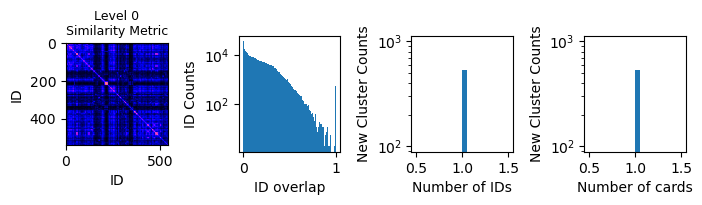

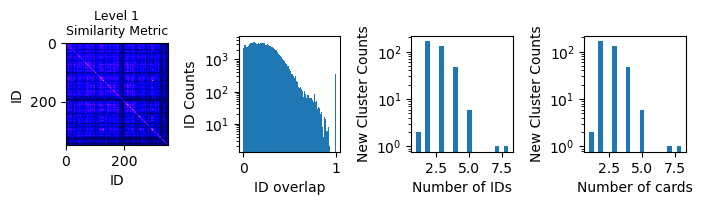

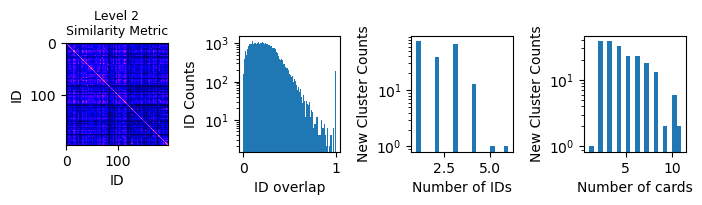

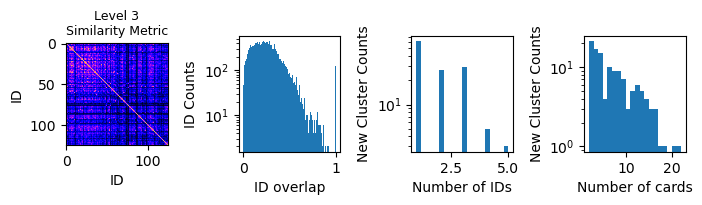

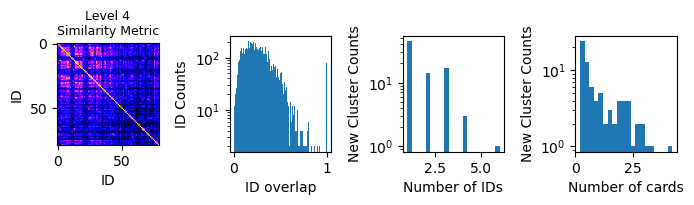

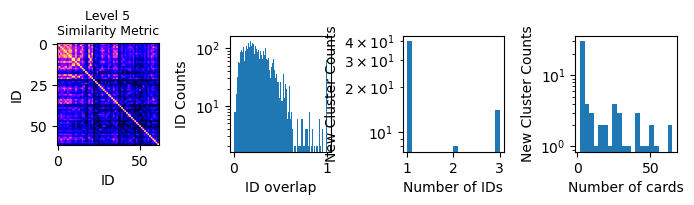

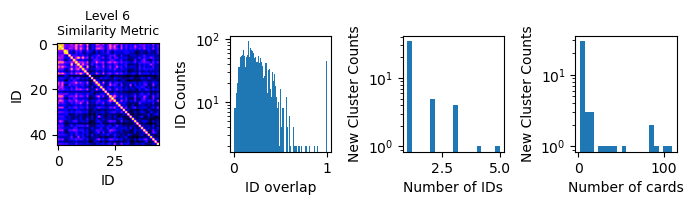

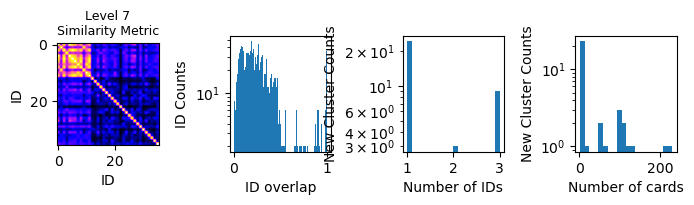

In [17]:
# Display context of whole graph clustering 

display_cluster_hierarchy_major_topics(cluster_hierarchy_meta_data, max_levels_to_display=3)
display_cluster_hierarchy_process_of_calculation(cluster_hierarchy_meta_data)

In [18]:
# Display context of a single cluster or card 

target_hierarchy_level = 1
target_cluster_ID = 3
display_cluster_hierarchy_of_cluster(cluster_hierarchy_meta_data, target_hierarchy_level, target_cluster_ID)

Grandparents
 Level: 3  ID: 51  Size: 9  Topics: Data Structure, Python, List, Problem Solving  ----- Numpy, Key-Value Pair, Indexing, Dict.items()
Parents
 Level: 2  ID: 51  Size: 7  Topics: Data Structure, Python, List, Problem Solving  ----- Numpy, Key-Value Pair, Indexing, Dict.items()
    Siblings
    Level: 1  ID: 249  Size: 2  Topics: Data Structure, Python, Tuple, Problem Solving  ----- Key-Value Pair, Indexing, Dict.items(), Dict
    Level: 1  ID: 36  Size: 4  Topics: Data Structure, Python, Problem Solving, List  ----- Numpy, Numeracy, Motivated Numeracy, Concatenation
    Self
    Level: 1  ID: 3  Size: 5  Topics: Python, Data Structure, Programming, List  ----- Numpy, Iterator, Next, Iter
       Children
       Level: 0  ID: 470  Size: 1  Topics: Python, Programming, Data, List  ----- Numpy, Scientific Computing, Manipulation, 3D Printing
       Level: 0  ID: 435  Size: 1  Topics: Python, Data Structure, Problem Solving, Programming  ----- Numpy, Key-value, Scientific Compu

In [19]:

# Get a list of embedding vectors from all clusters, with IDs

def get_all_unique_cluster_emb_vecs(cluster_hierarchy_meta_data):
    
    # This also removes non-unique clusters (ones that appear unchanged at multiple hierarchy levels, 
    # and it replaces them with only the lowest hierarchy where they appear. 
    
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    significant_clusters_unique_tuple_id_list = [] # for checking if this exact cluster is already found        
    all_unique_cluster_emb_vecs = {}
    for hierarchy_level in range(len(hierarchy_of_emb_vec_lists)):  # goes from low to high 
        
        unique_tuple_cardID_list_this_level = {(hierarchy_level, cluster_ID): tuple(sorted(cardIDs_list)) for cluster_ID, cardIDs_list 
                                       in enumerate(hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level])}
        
        cluster_emb_vecs_this_level = {(hierarchy_level, cluster_ID): emb_vec for cluster_ID, emb_vec 
                                       in enumerate(hierarchy_of_emb_vec_lists[hierarchy_level]) 
                                      if not (unique_tuple_cardID_list_this_level[(hierarchy_level, cluster_ID)] 
                                              in significant_clusters_unique_tuple_id_list)}
        all_unique_cluster_emb_vecs.update(cluster_emb_vecs_this_level)
        
        # Update list of unique ideas not to use in future. 
        significant_clusters_unique_tuple_id_list.extend(list(unique_tuple_cardID_list_this_level.values()))
    
    return all_unique_cluster_emb_vecs

def get_all_card_counts_over_unique_clusters(cluster_hierarchy_meta_data, all_unique_cluster_emb_vecs, knowledgeGraph):
    
    # This also removes non-unique clusters (ones that appear unchanged at multiple hierarchy levels, 
    # and it replaces them with only the lowest hierarchy where they appear. 
    
    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    all_card_counts = [{k: 0.0 for k in list(knowledgeGraph.cards.keys())} for _ in range(len(hierarchy_of_similarity_metrics))]
    
    for hierarchy_level, cluster_ID in all_unique_cluster_emb_vecs.keys():
        cluster_cardIDs_list = hierarchy_of_significant_clusters_cardIDs_list[hierarchy_level][cluster_ID]
        for _cardID in cluster_cardIDs_list:
            all_card_counts[hierarchy_level][_cardID] += 1.0
        
    return all_card_counts

all_unique_cluster_emb_vecs = get_all_unique_cluster_emb_vecs(cluster_hierarchy_meta_data)
all_card_counts = get_all_card_counts_over_unique_clusters(cluster_hierarchy_meta_data, all_unique_cluster_emb_vecs, kGraph)

display_dict_sorted_by_decreasing_value(all_unique_cluster_emb_vecs[(0,76)])
display_dict_sorted_by_decreasing_value(all_card_counts[6])

[('Random Distribution', 0.1296119215067626),
 ('Continuous Data', 0.12259824813708087),
 ('Grokking', 0.06413386331417838),
 ('Subspaces', 0.05984108755589131),
 ('Latent Variable Model', 0.05364967211844598),
 ('Flow Model', 0.053317677150813765),
 ('Mechanistic Interpretability', 0.040764313982353334),
 ('Layers', 0.02213152119191498),
 ('Generalization', 0.01902087589871079),
 ('Deep Unsupervised Learning', 0.015253796336537706)]
[(138, 4.0),
 (407, 4.0),
 (250, 4.0),
 (17, 3.0),
 (255, 3.0),
 (23, 3.0),
 (193, 3.0),
 (57, 3.0),
 (62, 3.0),
 (318, 3.0)]


### Old clustering with questions

In [20]:

def display_cluster_hierarchy_of_cluster(cluster_hierarchy_meta_data, target_cardID):

    [hierarchy_of_significant_clusters_IDgroups_list, 
     hierarchy_of_significant_clusters_cardIDs_list,
     hierarchy_of_emb_vec_lists,
     hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data
    
    num_hierarchy_levels = len(hierarchy_of_significant_clusters_IDgroups_list)

    children, parents, siblings = get_family_of_cluster(cluster_hierarchy_meta_data, 0, target_cardID)
    children_hierarchy_level = target_hierarchy_level - 1
    parent_hierarchy_level = target_hierarchy_level + 1
    
    # Display things, if they exist 
    if parent_hierarchy_level < num_hierarchy_levels - 1:
        
        # Get grandparents and display 
        grandparents_set = set()
        for parent in parents:
            _, grandparents, _ = get_family_of_cluster(cluster_hierarchy_meta_data, parent_hierarchy_level, parent)
            grandparents_set.update(set(grandparents))
        grandparents = list(grandparents_set)
        print('Grandparents')
        for grandparent in grandparents:
            display_clusters([grandparent], parent_hierarchy_level + 1, 0)
        
        # Display parents 
        print('Parents')
        display_clusters(parents, parent_hierarchy_level, 0)
    
    # Display siblings and self 
    print(extra_3space(1), 'Siblings')
    display_clusters(siblings, target_hierarchy_level,1)
    print(extra_3space(1), 'Self')
    display_clusters([target_cluster_ID], target_hierarchy_level,1)
    
    # Get children and grandchildren 
    if children_hierarchy_level >= 0:
        print(extra_3space(2), 'Children')
        for child in children:
            display_clusters([child], children_hierarchy_level, 2)
            grandchildren_hierarchy_level = children_hierarchy_level - 1
            if grandchildren_hierarchy_level >= 0:
                print(extra_3space(3), 'Grandchildren')
                grandchildren, *_ = get_family_of_cluster(cluster_hierarchy_meta_data, children_hierarchy_level, child)
                display_clusters(grandchildren, grandchildren_hierarchy_level, 3)

In [21]:
# Now make an embedding vector and then get overlap with clusters

question_emb_vec = emb_vec_weighted_union_of_nodes(question_subject_list, kGraph)
question_emb_vec_trimmed = trim_embedding_vector(question_emb_vec)

# Get overlap with all clusters 
cluster_overlaps = {k: emb_vec_inner_product(question_emb_vec_trimmed, v) for k, v in all_unique_cluster_emb_vecs.items()}
cluster_sorted_keys, cluster_sorted_overlap_values = get_dict_items_sorted_by_decreasing_value(cluster_overlaps)

# Get overlap with all cards directly  
card_overlaps = {k: emb_vec_inner_product(question_emb_vec_trimmed, card.embedding_vector_trimmed) for k, card in kGraph.cards.items()}
card_sorted_keys, card_sorted_overlap_values = get_dict_items_sorted_by_decreasing_value(card_overlaps)

for cardID, olap in zip(card_sorted_keys[0:10], card_sorted_overlap_values[0:10]):
    print(kGraph.cards[cardID].topic, olap,' --- ', kGraph.cards[cardID].question)
    
# Scan through clusters and find best overlap 

verbose = True
card_votes = {}
card_mentions = {}

[hierarchy_of_significant_clusters_IDgroups_list, 
 hierarchy_of_significant_clusters_cardIDs_list,
 hierarchy_of_emb_vec_lists,
 hierarchy_of_similarity_metrics]  = cluster_hierarchy_meta_data

max_print= len(cluster_sorted_keys)
for olap_ind, ((hier, _ID), olap) in enumerate(list(zip(cluster_sorted_keys[0:max_print], cluster_sorted_overlap_values[0:max_print]))):
    cluster_cardIDs = hierarchy_of_significant_clusters_cardIDs_list[hier][_ID]
    cluster_card_size = len(cluster_cardIDs)
    
    total_votes = np.sum(list(card_votes.values()))
    total_previous_mentions = np.sum(list(card_mentions.values()))
    
    # First get how often the cards in this cluster have been voted for 
    cluster_previous_votes = 0.0
    cluster_current_mentions = 0.0
    cluster_previous_mentions = 0.0
    cluster_max_current_mentions = 0.0
    for _cardID in cluster_cardIDs:
        key = (_cardID, kGraph.cards[_cardID].topic)
        card_current_mentions = card_mentions.get(key, 0.0) + 1.0
        cluster_previous_votes += card_votes.get(key, 0.0)
        cluster_current_mentions += card_current_mentions
        cluster_previous_mentions += card_mentions.get(key, 0.0)
        cluster_max_current_mentions = (card_current_mentions if card_current_mentions > cluster_max_current_mentions 
                                         else cluster_max_current_mentions)
        
    if total_votes > 0:
        cluster_current_fraction_of_total_votes = cluster_previous_votes / total_votes
    else:
        cluster_current_fraction_of_total_votes = 0.0
        
    total_current_mentions = (total_previous_mentions + cluster_current_mentions - cluster_previous_mentions)
    cluster_current_fraction_of_total_mentions = cluster_current_mentions / total_current_mentions
    
    # Want to privilege cards that appear early in the list of similarity, and appear in all their forms (in all the clusters they appear in)
    # That way we are measuring how well a question overlaps with a card, relative to that cards overlap with everything. 
    # Add more votes to each card, so that each cluster gets basically one total vote 
    for _cardID in cluster_cardIDs:
        key = (_cardID, kGraph.cards[_cardID].topic)
        card_previous_votes = card_votes.get(key, 0.0)
        card_current_mentions = card_mentions.get(key, 0.0) + 1.0
        card_total_mentions_in_all_clusters_at_this_hierarchy_level =  all_card_counts[hier][_cardID]
        
        card_effective_olap_ind = (1.0 + olap_ind) / (card_current_mentions) 
            # if we mention the card every time, its effective olap ind is still 1.0
            # this increases from 1 upward. Larger values means we should value it less. 
        
        card_relative_familiarity_in_cluster = card_current_mentions / cluster_max_current_mentions
            # This is from 0 to 1, depending on how much we have seen this card compared to the max over rest of the cluster, 
            # This is a metric for how much to weight the information about this specific card from this cluster 
            
        card_hierarchy_bonus = (1.0 + hier)
            
        card_votes[key] = card_previous_votes +  (card_hierarchy_bonus * card_relative_familiarity_in_cluster * 
                                                  cluster_current_fraction_of_total_mentions / card_effective_olap_ind / 
                                                  card_total_mentions_in_all_clusters_at_this_hierarchy_level) 
        
    # Finally update previous mentions
    for _cardID in cluster_cardIDs:
        key = (_cardID, kGraph.cards[_cardID].topic)
        card_mention = card_mentions.get(key, 0.0)
        card_mentions[key] = card_mention + 1.0
        
# display_dict_sorted_by_decreasing_value(card_votes,10)

card_sorted_keys, card_sorted_vote_values = get_dict_items_sorted_by_decreasing_value(card_votes)

max_print = 10
for (_cardID, topic), vote in zip(card_sorted_keys[0:max_print], card_sorted_vote_values[0:max_print]):
    _cardID = int(_cardID)
    print('Card:', _cardID, ' with votes:', np.round(vote,3)) if verbose else None
    print('   Topic and question:', topic, '-', kGraph.cards[_cardID].question) if verbose else None



NameError: name 'question_subject_list' is not defined